In [7]:
import pandas as pd

In [10]:
df = pd.read_csv("/home/r4ph/desenv/exception-miner-multi/llm/data/new_flask_llm.csv")

In [11]:
def get_first_word_before_comma(text):
    # Find the position of the first comma
    comma_index = text.find(',')

    # If there's no comma, return -1 to indicate an invalid result
    if comma_index == -1:
        first_word = text
        first_word = first_word.replace("\n", "")
        if first_word.lower() == "yes":
            return 1
        elif first_word.lower() == "no":
            return 0
        else:
            return -1

    # Extract the substring before the comma
    first_part = text[:comma_index]

    # Split the substring to get the first word
    first_word = first_part.split()[0]

    # Check for "Yes/yes" or "No/no"
    if first_word.lower() == "yes":
        return 1
    elif first_word.lower() == "no":
        return 0
    else:
        return -1

In [12]:
df['llm_resp_binary'] = df['llm_response'].apply(get_first_word_before_comma)
#df['llm_resp_binary'] = df['llm_response'].apply(lambda x: 1 if 'yes' in x.lower() else 0)

In [13]:
df[df['llm_resp_binary'] == -1].head(2)

,file,function,func_body,str_uncaught_exceptions,n_try_except,n_try_pass,n_finally,n_generic_except,n_raise,n_captures_broad_raise,...,str_raise_identifiers,str_except_block,n_nested_try,n_bare_except,n_bare_raise_finally,str_code_without_try_except,project,prompt_type,llm_response,llm_resp_binary
2,/home/r4ph/desenv/exception-miner-multi/projec...,url_for,"def url_for(\n self,\n /,\n ...",NaN,1,0,0,0,2,0,...,RuntimeError ValueError,values.update(\n _anchor=_ancho...,0,0,0,"def url_for(\n self,\n /,\n ...",flask,style-1-shot,\nThe code needs an exception handling mechani...,-1
7,/home/r4ph/desenv/exception-miner-multi/projec...,test_get_method_on_g,def test_get_method_on_g(app_ctx):\n assert...,NaN,0,0,0,0,0,0,...,NaN,NaN,0,0,0,NaN,flask,style-cot,\nThe code snippet provided does not contain a...,-1


In [14]:
df.groupby(['n_try_except', 'llm_resp_binary']).count()

file  function  func_body  \
n_try_except llm_resp_binary                              
0            -1                  1         1          1   
              0                  1         1          1   
              1                  2         2          2   
1            -1                  1         1          1   
              0                  1         1          1   
              1                  2         2          2   

                              str_uncaught_exceptions  n_try_pass  n_finally  \
n_try_except llm_resp_binary                                                   
0            -1                                     0           1          1   
              0                                     0           1          1   
              1                                     0           2          2   
1            -1                                     0           1          1   
              0                                     0           1          1   
              1                                     0           2          2   

                              n_generic_except  n_raise  \
n_try_except llm_resp_binary                              
0            -1                              1        1   
              0                              1        1   
              1                              2        2   
1            -1                              1        1   
              0                              1        1   
              1                              2        2   

                              n_captures_broad_raise  \
n_try_except llm_resp_binary                           
0            -1                                    1   
              0                                    1   
              1                                    2   
1            -1                                    1   
              0                                    1   
              1                                    2   

                              n_captures_try_except_raise  ...  \
n_try_except llm_resp_binary                               ...   
0            -1                                         1  ...   
              0                                         1  ...   
              1                                         2  ...   
1            -1                                         1  ...   
              0                                         1  ...   
              1                                         2  ...   

                              str_except_identifiers  str_raise_identifiers  \
n_try_except llm_resp_binary                                                  
0            -1                                    0                      0   
              0                                    0                      0   
              1                                    0                      0   
1            -1                                    1                      1   
              0                                    1                      1   
              1                                    2                      2   

                              str_except_block  n_nested_try  n_bare_except  \
n_try_except llm_resp_binary                                                  
0            -1                              0             1              1   
              0                              0             1              1   
              1                              0             2              2   
1            -1                              1             1              1   
              0                              1             1              1   
              1                              2             2              2   

                              n_bare_raise_finally  \
n_try_except llm_resp_binary                         
0            -1                                  1   
              0                      

In [15]:
df_matrix = df[df['llm_resp_binary'] != -1]
df_matrix.shape

(6, 25)

In [16]:
df_matrix.head(2)

,file,function,func_body,str_uncaught_exceptions,n_try_except,n_try_pass,n_finally,n_generic_except,n_raise,n_captures_broad_raise,...,str_raise_identifiers,str_except_block,n_nested_try,n_bare_except,n_bare_raise_finally,str_code_without_try_except,project,prompt_type,llm_response,llm_resp_binary
0,/home/r4ph/desenv/exception-miner-multi/projec...,url_for,"def url_for(\n self,\n /,\n ...",NaN,1,0,0,0,2,0,...,RuntimeError ValueError,values.update(\n _anchor=_ancho...,0,0,0,"def url_for(\n self,\n /,\n ...",flask,style-default,"\nYes, the code needs an exception handling me...",1
1,/home/r4ph/desenv/exception-miner-multi/projec...,test_get_method_on_g,def test_get_method_on_g(app_ctx):\n assert...,NaN,0,0,0,0,0,0,...,NaN,NaN,0,0,0,NaN,flask,style-default,\nYes,1


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_true = df_matrix['n_try_except']
y_pred = df_matrix['llm_resp_binary']

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f_measure = f1_score(y_true, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f_measure:.2f}")

# Optionally, display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.50
Precision: 0.50
Recall: 0.67
F-measure: 0.57

Confusion Matrix:
[[1 2]
 [1 2]]


In [18]:

metrics_results = []

# Evaluate metrics for each prompt type
for prompt_type in df_matrix['prompt_type'].unique():
    results = df_matrix[df_matrix['prompt_type'] == prompt_type]

    y_true = results['n_try_except']
    y_pred = results['llm_resp_binary']

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f_measure = f1_score(y_true, y_pred)

    # Store the metrics
    metrics_results.append({
        'prompt_type': prompt_type,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f_measure': f_measure
    })

    # Print metrics
    print(f"\nMetrics for {prompt_type} prompt:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F-measure: {f_measure:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

# Convert the metrics results into a DataFrame and save to CSV
metrics_df = pd.DataFrame(metrics_results)


Metrics for style-default prompt:
Accuracy: 0.50
Precision: 0.50
Recall: 1.00
F-measure: 0.67

Confusion Matrix:
[[0 1]
 [0 1]]

Metrics for style-1-shot prompt:
Accuracy: 1.00
Precision: 0.00
Recall: 0.00
F-measure: 0.00

Confusion Matrix:
[[1]]

Metrics for style-few-shot prompt:
Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F-measure: 0.00

Confusion Matrix:
[[0 1]
 [1 0]]

Metrics for style-cot prompt:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F-measure: 1.00

Confusion Matrix:
[[1]]


/home/r4ph/desenv/exception-miner-multi/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/r4ph/desenv/exception-miner-multi/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/r4ph/desenv/exception-miner-multi/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [19]:
metrics_df

,prompt_type,accuracy,precision,recall,f_measure
0,style-default,0.5,0.5,1.0,0.666667
1,style-1-shot,1.0,0.0,0.0,0.000000
2,style-few-shot,0.0,0.0,0.0,0.000000
3,style-cot,1.0,1.0,1.0,1.000000


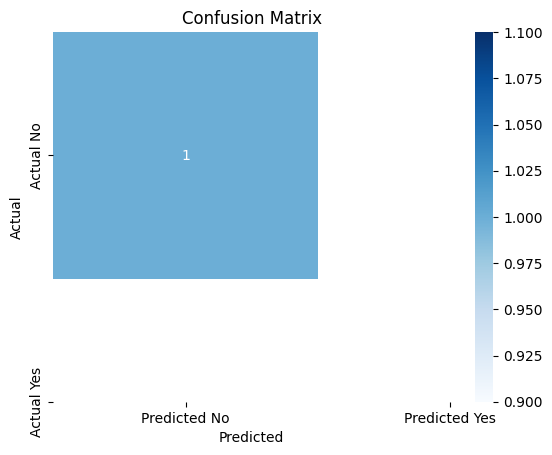

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
